# Data Understanding

In [554]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from typing import TypeVar
import matplotlib.pyplot as plt


# Helps Type Hinting Custom Function
# PandasDataFrame = TypeVar('pandas.core.frame.DataFrame')
# PandasSeries = TypeVar('pandas.core.series.Series')

# Setting the Location for the DataSet
required_csv_file = "data/loan.csv"
# csv_sep_value = r'\s*,\s*' # Set the Separator Value here.
csv_sep_value = ","
loan_df = pd.read_csv(required_csv_file, header=0, engine='python')
print(f"The shape of the dataframe comprises of (rows, cols)={loan_df.shape}")


The shape of the dataframe comprises of (rows, cols)=(39717, 111)


In [555]:
# Printing relevant meta data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [556]:
# checking the datatypes of the columns in the dataset
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [557]:
# Printing a sample of the DataSet
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,88854,70699,5000,5000,225.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,94838,73673,3000,3000,2550.0,36 months,10.28%,97.20,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,142608,74724,5000,5000,2350.0,36 months,10.59%,162.73,C,C2,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,76597,76583,5000,5000,1775.0,36 months,9.01%,159.03,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,123230,80353,3175,3175,1425.0,36 months,11.54%,104.76,C,C5,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

In [558]:
# In this sample there seems to be some values which aren't a number (NaN). I wonder how many of these exist in a column.
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [559]:
# It seems that the number of NaN in a column is the same number as that as the rows.
def print_percentage_of_values(given_df_series : pd.Series) -> None:
    number_of_rows = len(given_df_series)
    value_counts = given_df_series.value_counts()
    print(round(value_counts.apply(lambda x : x*100/number_of_rows), 2))

# Printing the same to confirm.
def print_fraction_of_missing_values(given_df : pd.DataFrame) -> None:
    number_of_rows = len(given_df.index)
    fraction_of_values = given_df.isnull().sum()/number_of_rows * 100
    # print(type(fraction_of_values))
    print(round(number=fraction_of_values, ndigits=2))
print_fraction_of_missing_values(given_df=loan_df)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [560]:
# There seems to be some 100% values for some columns. Removing these columns and printing the new base data.
def drop_all_na_columns_from_dataframe(given_df : pd.DataFrame) -> pd.DataFrame:
    given_df.dropna(axis=1, how='all', inplace=True)
    return given_df

loan_df = drop_all_na_columns_from_dataframe(given_df=loan_df)
print_fraction_of_missing_values(given_df=loan_df)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [561]:
# There also seems to be some columns with very high percentage of Not a Number values
# next_pymnt_d, mths_since_last_record and mths_since_last_delinq
# We should remove these columns from our analyis as it doesn't add any value.

def drop_specific_columns_from_dataframe(given_df : pd.DataFrame, column_list : list[str]) -> pd.DataFrame:
    given_df.drop(column_list, axis = 1, inplace = True) 
    return given_df


loan_df = drop_specific_columns_from_dataframe(given_df=loan_df, column_list=['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq'])
# print(loan_df.dtypes)
print(f"New shape of Dataframe : {loan_df.shape}")
print_fraction_of_missing_values(given_df=loan_df)

New shape of Dataframe : (39717, 54)
id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line           

In [562]:
# Analysing Unique Values for every column
loan_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [563]:
# There are now a columns having 32.58% missing values - 
# desc
# Printing the contents of these columns
print(loan_df.loc[:, ['desc']].head())

                                                desc
0                                                NaN
1  I bought a few months ago a cool duplex in the...
2  This loan will be put toward getting back into...
3                             downpayment on a Pony!
4  I am starting my own small business. I am a re...


In [564]:
# The above information could be used further,
# desc - if one were to use NLP techniques for further analysis.
# Dropping the column
loan_df = drop_specific_columns_from_dataframe(given_df=loan_df, column_list=['desc'])
print_fraction_of_missing_values(given_df=loan_df)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [565]:
# Now it seems like the filtered columns have lesser missing values or NaN.
# What if rows, have missing values?
loan_df.isnull().sum(axis=1)

0        4
1        4
2        1
3        4
4        1
        ..
39712    1
39713    0
39714    0
39715    1
39716    0
Length: 39717, dtype: int64

In [566]:
# There are some rows with 4 values missing. Checking if any have more than 5 values missing.
print(f"Number of Rows having more than 5 missing values : {len(loan_df[loan_df.isnull().sum(axis=1) > 5].index)}")

Number of Rows having more than 5 missing values : 0


In [567]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [568]:
# Printing Unique values
print(loan_df.nunique().sort_values(ascending=True))

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [569]:
# Some of these columns have only a single value.
# They're not helpful for further analysis. Removing the same.
# tax_liens                         1
# delinq_amnt                       1
# chargeoff_within_12_mths          1
# acc_now_delinq                    1
# application_type                  1
# policy_code                       1
# collections_12_mths_ex_med        1
# initial_list_status               1
# pymnt_plan                        1
list_of_columns = [
    'tax_liens',
    'delinq_amnt', 
    'chargeoff_within_12_mths',
    'acc_now_delinq',
    'application_type',
    'policy_code',
    'collections_12_mths_ex_med',
    'initial_list_status',
    'pymnt_plan'
]

loan_df = drop_specific_columns_from_dataframe(given_df=loan_df, column_list=list_of_columns)


In [570]:
# Checking data and converting them to their correct datatypes.
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [571]:
# There seems to be plenty of values which are deemed as object/string.
# Can any of these be converted to their proper type?

print(loan_df.term.head())
# Term in the dataset is available as string
# and is represented as a number followed by a suffix of "months"
# replacing the "months" with empty string and converting it to int
loan_df.term = loan_df.term.apply(lambda x: int(x.replace('months', '').strip()))
loan_df.term.describe()
# Their seems to be either loan terms for 36 months or 60 months.

0     36 months
1     36 months
2     36 months
3     36 months
4     36 months
Name: term, dtype: object


count    39717.000000
mean        42.418007
std         10.622815
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

In [572]:

# int_rate - Interest Rate of the loan is set as string. Converting it to float.
# Also removing the suffix of "%"
def remove_percentage_suffix(given_value) -> float:
    if isinstance(given_value, str):
        return given_value.replace('%', '').strip()
    else:
        return given_value

def print_df_series_and_remove_percentage_suffix(given_df_series : pd.Series) -> pd.Series:
    print(f"BEFORE : \n{given_df_series.head()}")
    given_df_series = given_df_series.apply(lambda x: float(remove_percentage_suffix(given_value=x)))
    print(f"DESCRIBE : \n{given_df_series.describe()}")
    print(f"AFTER : \n{given_df_series.head()}")
    return given_df_series

loan_df.int_rate = print_df_series_and_remove_percentage_suffix(given_df_series=loan_df.int_rate)


BEFORE : 
0     7.43%
1    10.28%
2    10.59%
3     9.01%
4    11.54%
Name: int_rate, dtype: object
DESCRIBE : 
count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64
AFTER : 
0     7.43
1    10.28
2    10.59
3     9.01
4    11.54
Name: int_rate, dtype: float64


In [573]:
# issue_d - The month which the loan was funded 
# converting this column type to date format
def convert_to_datetime(given_df_series : pd.Series, format : str) -> pd.Series:
    return pd.to_datetime(given_df_series, format=format)

def print_df_series_and_convert_datetime(given_df_series : pd.Series, format : str) -> pd.Series:
    print(f"BEFORE : \n{given_df_series.head()}")
    given_df_series = convert_to_datetime(given_df_series=given_df_series, format=format)
    print(f"DESCRIBE : \n{given_df_series.describe(datetime_is_numeric=True)}")
    print(f"AFTER : \n{given_df_series.head()}")
    return given_df_series


loan_df.issue_d = print_df_series_and_convert_datetime(given_df_series=loan_df.issue_d, format='%b-%y')


BEFORE : 
0    Aug-07
1    Jul-07
2    Oct-07
3    Jul-07
4    Aug-07
Name: issue_d, dtype: object
DESCRIBE : 
count                            39717
mean     2010-11-03 23:26:45.166553344
min                2007-06-01 00:00:00
25%                2010-05-01 00:00:00
50%                2011-02-01 00:00:00
75%                2011-08-01 00:00:00
max                2011-12-01 00:00:00
Name: issue_d, dtype: object
AFTER : 
0   2007-08-01
1   2007-07-01
2   2007-10-01
3   2007-07-01
4   2007-08-01
Name: issue_d, dtype: datetime64[ns]


In [574]:
# earliest_cr_line - The month the borrower's earliest reported credit line was opened
loan_df.earliest_cr_line = print_df_series_and_convert_datetime(given_df_series=loan_df.earliest_cr_line, format='%b-%y')


BEFORE : 
0    Mar-95
1    Feb-97
2    Jan-99
3    Apr-03
4    Feb-04
Name: earliest_cr_line, dtype: object
DESCRIBE : 
count                            39717
mean     1997-04-11 16:09:21.250849792
min                1969-02-01 00:00:00
25%                1993-12-01 00:00:00
50%                1998-05-01 00:00:00
75%                2001-09-01 00:00:00
max                2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object
AFTER : 
0   1995-03-01
1   1997-02-01
2   1999-01-01
3   2003-04-01
4   2004-02-01
Name: earliest_cr_line, dtype: datetime64[ns]


In [575]:
# revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
loan_df.revol_util = print_df_series_and_remove_percentage_suffix(given_df_series=loan_df.revol_util)

BEFORE : 
0    13.70%
1        0%
2        0%
3    36.60%
4    55.10%
Name: revol_util, dtype: object
DESCRIBE : 
count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64
AFTER : 
0    13.7
1     0.0
2     0.0
3    36.6
4    55.1
Name: revol_util, dtype: float64


In [576]:
# last_pymnt_d - Last month payment was received
loan_df.last_pymnt_d = print_df_series_and_convert_datetime(given_df_series=loan_df.last_pymnt_d, format='%b-%y')


BEFORE : 
0    Mar-08
1    Jul-10
2    Oct-10
3    Jul-10
4    Mar-08
Name: last_pymnt_d, dtype: object
DESCRIBE : 
count                            39646
mean     2013-04-10 05:32:22.652474368
min                2008-01-01 00:00:00
25%                2012-04-01 00:00:00
50%                2013-04-01 00:00:00
75%                2014-06-01 00:00:00
max                2016-05-01 00:00:00
Name: last_pymnt_d, dtype: object
AFTER : 
0   2008-03-01
1   2010-07-01
2   2010-10-01
3   2010-07-01
4   2008-03-01
Name: last_pymnt_d, dtype: datetime64[ns]


In [577]:
# last_credit_pull_d - The most recent month LC pulled credit for this loan
loan_df.last_credit_pull_d = print_df_series_and_convert_datetime(given_df_series=loan_df.last_credit_pull_d, format="%b-%y")

BEFORE : 
0    May-07
1    Feb-13
2    Sep-10
3    Jul-10
4    Apr-16
Name: last_credit_pull_d, dtype: object
DESCRIBE : 
count                            39715
mean     2014-09-07 19:16:08.007050240
min                2007-05-01 00:00:00
25%                2013-06-01 00:00:00
50%                2015-03-01 00:00:00
75%                2016-05-01 00:00:00
max                2016-05-01 00:00:00
Name: last_credit_pull_d, dtype: object
AFTER : 
0   2007-05-01
1   2013-02-01
2   2010-09-01
3   2010-07-01
4   2016-04-01
Name: last_credit_pull_d, dtype: datetime64[ns]


In [578]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   member_id                39717 non-null  int64         
 2   loan_amnt                39717 non-null  int64         
 3   funded_amnt              39717 non-null  int64         
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  int64         
 6   int_rate                 39717 non-null  float64       
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_title                37258 non-null  object        
 11  emp_length               38642 non-null  object        
 12  home_ownership           39717 n

In [579]:
# Some of the columns mentioned above are determined only after the loan is provided to a borrower.
# For our analysis, we cannot consider post-approval features. Hence the following are removed.
# Along with others which don't add any value to our analysis
list_of_columns = [
    "id",
    "member_id",
    "url",
    "title",
    "emp_title",
    "zip_code",
    "last_credit_pull_d",
    "addr_state",
    "out_prncp_inv",
    "total_pymnt_inv",
    "funded_amnt",
    "delinq_2yrs",
    "revol_bal",
    "out_prncp",
    "total_pymnt",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "last_pymnt_d",
    "last_pymnt_amnt",
    "pub_rec_bankruptcies",
    "earliest_cr_line",
    "open_acc",
    "inq_last_6mths",
    "revol_util",
    "pub_rec",
    "total_acc"
]
loan_df = drop_specific_columns_from_dataframe(given_df=loan_df, column_list=list_of_columns)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            39717 non-null  int64         
 1   funded_amnt_inv      39717 non-null  float64       
 2   term                 39717 non-null  int64         
 3   int_rate             39717 non-null  float64       
 4   installment          39717 non-null  float64       
 5   grade                39717 non-null  object        
 6   sub_grade            39717 non-null  object        
 7   emp_length           38642 non-null  object        
 8   home_ownership       39717 non-null  object        
 9   annual_inc           39717 non-null  float64       
 10  verification_status  39717 non-null  object        
 11  issue_d              39717 non-null  datetime64[ns]
 12  loan_status          39717 non-null  object        
 13  purpose              39717 non-

In [580]:
# Removing all rows where Loan Status is Current. No further analysis can be performed on them.
loan_df = loan_df[loan_df.loan_status != "Current"]
print(loan_df.loan_status.unique())
LOAN_STATUS_FULLY_PAID = "Fully Paid"
LOAN_STATUS_CHARGED_OFF = "Charged Off"
loan_df.loan_status = pd.to_numeric(loan_df.loan_status.apply(lambda x: 0 if x==LOAN_STATUS_FULLY_PAID else 1))
# Setting Fully Paid Loan Statuses to 0 Else 1
# summarising the values
loan_df['loan_status'].value_counts()

['Fully Paid' 'Charged Off']


0    32950
1     5627
Name: loan_status, dtype: int64

In [581]:
loan_df.shape

(38577, 15)

# Data Analysis

In [582]:
# Now this dataframe seems largely clean.
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38577 non-null  int64         
 1   funded_amnt_inv      38577 non-null  float64       
 2   term                 38577 non-null  int64         
 3   int_rate             38577 non-null  float64       
 4   installment          38577 non-null  float64       
 5   grade                38577 non-null  object        
 6   sub_grade            38577 non-null  object        
 7   emp_length           37544 non-null  object        
 8   home_ownership       38577 non-null  object        
 9   annual_inc           38577 non-null  float64       
 10  verification_status  38577 non-null  object        
 11  issue_d              38577 non-null  datetime64[ns]
 12  loan_status          38577 non-null  int64         
 13  purpose              38577 non-

## Uni Variate Analysis

In [583]:
# loan_amt is the amount asked by the borrower
# funded_amt is the amount of money approved by the approver
# funded_amt_invested is the amount given by the investor

In [584]:
round(np.mean(loan_df.loan_status)*100,2)
# About 14.59% of all Loan Statuses are being charged off.

14.59

In [585]:
print(loan_df.emp_length.value_counts())
print(f"DESCRIBE : \n{loan_df.emp_length.describe()}")

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64
DESCRIBE : 
count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object


In [586]:
# There are a lot of loans taken for above +10 years.
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
# print(loan_df.emp_length.isnull().sum())

def return_cleaned_emp_length(given_value : str) -> int:
    if isinstance(given_value, str):
        if "<" in given_value:
            return 0 # Default value for < 1 year
        elif "+" in given_value:
            return int(given_value.split("+")[0])
        else:
            return int(given_value.split()[0])


loan_df.emp_length = loan_df.emp_length.apply(lambda x: return_cleaned_emp_length(given_value=x))
print(loan_df.emp_length.value_counts())
print(f"DESCRIBE : \n{loan_df.emp_length.describe()}")

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64
DESCRIBE : 
count    38577.000000
mean         5.076445
std          3.602917
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


In [587]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti
0,5000,225.0,36,7.43,155.38,A,A2,4,RENT,200000.0,Not Verified,2007-08-01,0,house,0.28
1,3000,2550.0,36,10.28,97.20,C,C1,2,MORTGAGE,200000.0,Not Verified,2007-07-01,0,home_improvement,0.00
2,5000,2350.0,36,10.59,162.73,C,C2,0,RENT,15000.0,Not Verified,2007-10-01,0,other,24.40
3,5000,1775.0,36,9.01,159.03,B,B2,1,MORTGAGE,250000.0,Not Verified,2007-07-01,0,other,10.00
4,3175,1425.0,36,11.54,104.76,C,C5,0,OWN,15000.0,Not Verified,2007-08-01,1,small_business,12.24


In [588]:
loan_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38577 non-null  int64         
 1   funded_amnt_inv      38577 non-null  float64       
 2   term                 38577 non-null  int64         
 3   int_rate             38577 non-null  float64       
 4   installment          38577 non-null  float64       
 5   grade                38577 non-null  object        
 6   sub_grade            38577 non-null  object        
 7   emp_length           38577 non-null  int64         
 8   home_ownership       38577 non-null  object        
 9   annual_inc           38577 non-null  float64       
 10  verification_status  38577 non-null  object        
 11  issue_d              38577 non-null  datetime64[ns]
 12  loan_status          38577 non-null  int64         
 13  purpose              38577 non-

In [589]:
print(loan_df.annual_inc.describe())


count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


In [590]:

def plot_df_series_box_plot(given_df_series : pd.Series) -> None:
    print(given_df_series.plot.box(figsize=(8, 6), showmeans=True, grid=True))

def plot_df_series_histogram(given_df_series : pd.Series) -> None:
    print(given_df_series.value_counts())
    print(sns.histplot(given_df_series, legend=True).tick_params(axis='x', rotation=90))

def plot_df_series_box_plot_on_categorical_data(df: pd.DataFrame, x:str, y: str, sort_on : list[str] = None) -> None:
    if sort_on:
        temp_df = df.sort_values(by=sort_on)
    else:
        temp_df = df
    sns.boxplot(x=temp_df[x], y=temp_df[y])
    plt.xticks(rotation=90)

def plot_df_series_histogram_on_categorical_data(df: pd.DataFrame, x: str, y:str, hue: str) -> None:
    temp_df = df.sort_values(by=[x,y])
    plt.figure(figsize=(10,10))
    sns.barplot(data=temp_df,x=x, y=y, hue=hue, palette="deep")
    plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


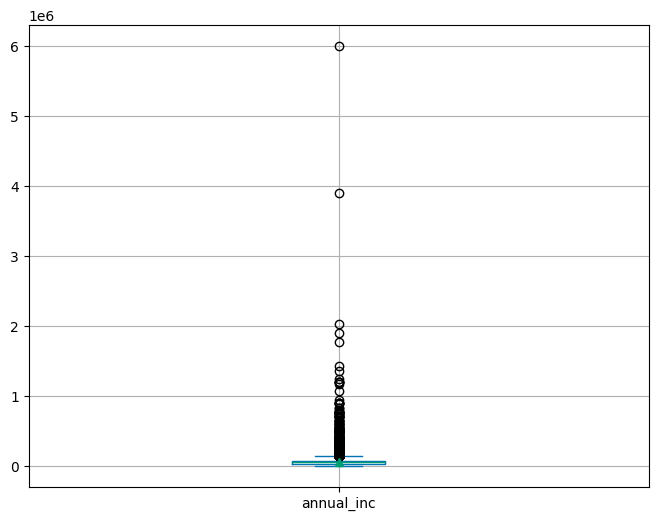

In [591]:

plot_df_series_box_plot(given_df_series=loan_df.annual_inc)

In [592]:
# There are some outliers.
loan_df.annual_inc.quantile([0.5, 0.75, 0.90, 0.95, 0.97, 0.98, 0.99])

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [593]:
# Removing the outliers which are greater than 95% of the dataset.
loan_df = loan_df[loan_df.annual_inc <= loan_df.annual_inc.quantile(0.95)]
loan_df.shape

(36654, 15)

AxesSubplot(0.125,0.11;0.775x0.77)


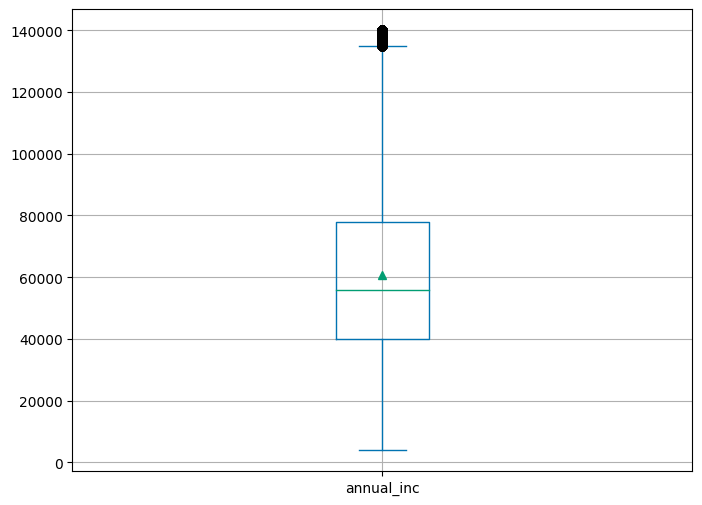

In [594]:
plot_df_series_box_plot(loan_df.annual_inc)

60000.0     1466
50000.0     1029
40000.0      855
45000.0      811
30000.0      808
            ... 
35292.0        1
32868.0        1
139900.0       1
63720.0        1
12252.0        1
Name: annual_inc, Length: 4789, dtype: int64
None


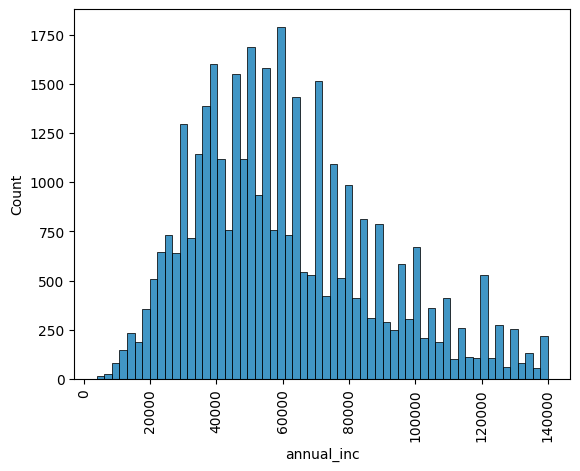

In [595]:
plot_df_series_histogram(loan_df.annual_inc)

AxesSubplot(0.125,0.11;0.775x0.77)


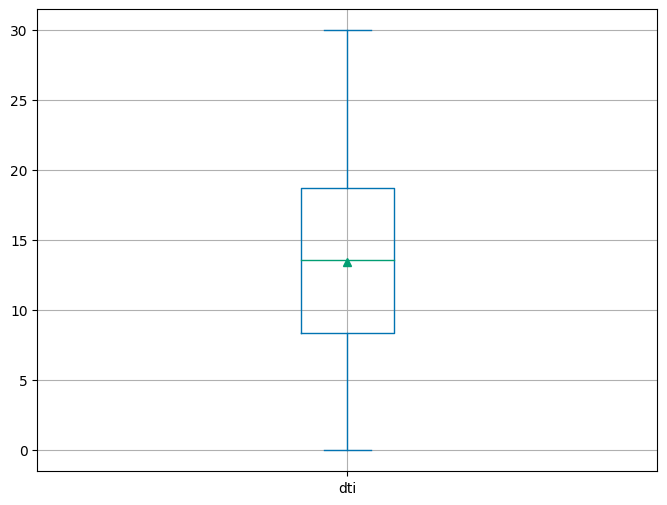

In [596]:
plot_df_series_box_plot(given_df_series=loan_df.dti)

0.00     170
18.00     44
12.00     42
19.20     39
13.20     38
        ... 
25.35      1
26.91      1
27.98      1
27.44      1
29.85      1
Name: dti, Length: 2848, dtype: int64
None


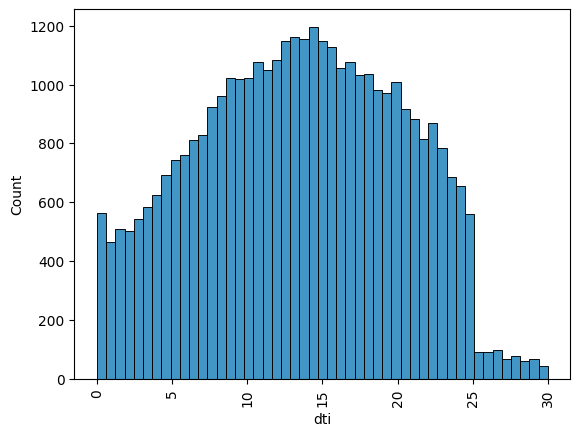

In [597]:
plot_df_series_histogram(loan_df.dti)

AxesSubplot(0.125,0.11;0.775x0.77)


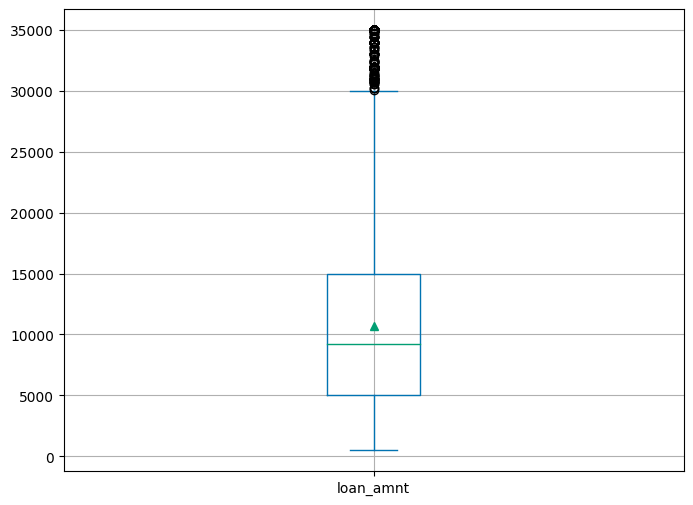

In [598]:
plot_df_series_box_plot(given_df_series=loan_df.loan_amnt)

In [599]:
# There are some outliers too with loan_amnt
loan_df.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])
# But this cannot be removed.

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

AxesSubplot(0.125,0.11;0.775x0.77)


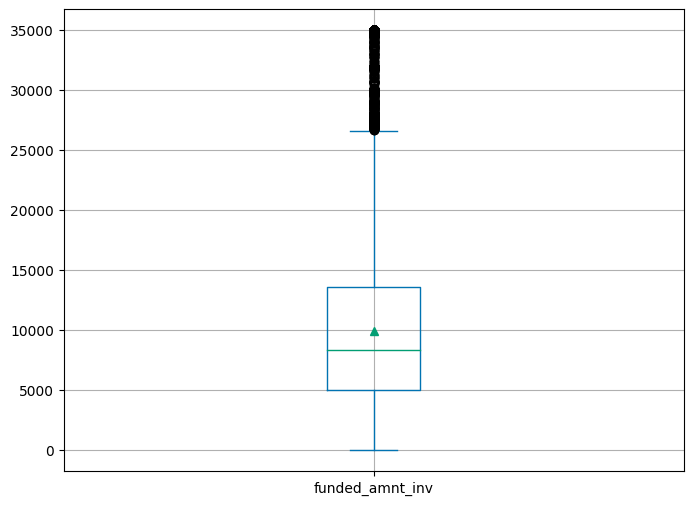

In [600]:
plot_df_series_box_plot(given_df_series=loan_df.funded_amnt_inv)

In [601]:
loan_df.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8375.000000
0.750    13623.731415
0.900    19750.000000
0.950    23941.875589
0.970    24975.000000
0.975    25350.000000
0.980    27950.000000
0.985    29925.000000
0.990    31954.028576
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

AxesSubplot(0.125,0.11;0.775x0.77)


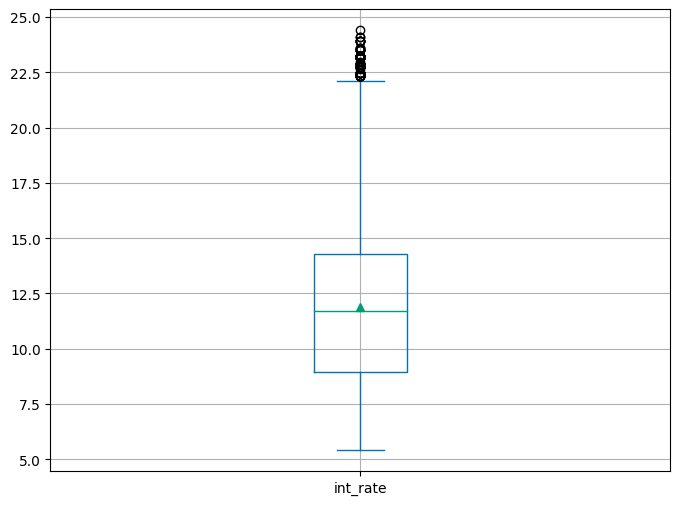

In [602]:
plot_df_series_box_plot(given_df_series=loan_df.int_rate)

10.99    863
7.51     768
11.49    756
13.49    722
7.88     702
        ... 
22.64      1
21.48      1
16.20      1
24.40      1
18.72      1
Name: int_rate, Length: 370, dtype: int64
None


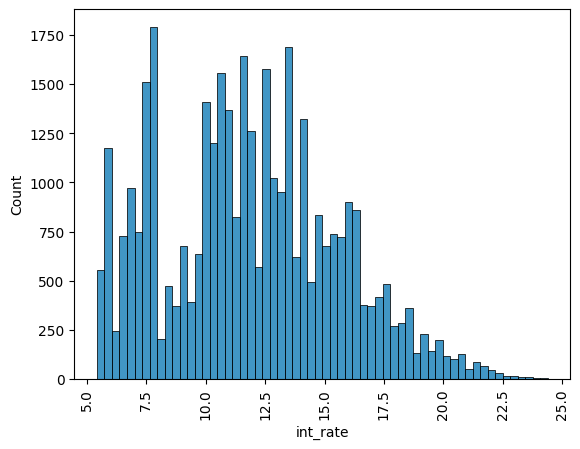

In [603]:
# There seems to be some rate of interests that are really high.
plot_df_series_histogram(given_df_series=loan_df.int_rate)

RENT        18031
MORTGAGE    15675
OWN          2852
OTHER          96
Name: home_ownership, dtype: int64
None


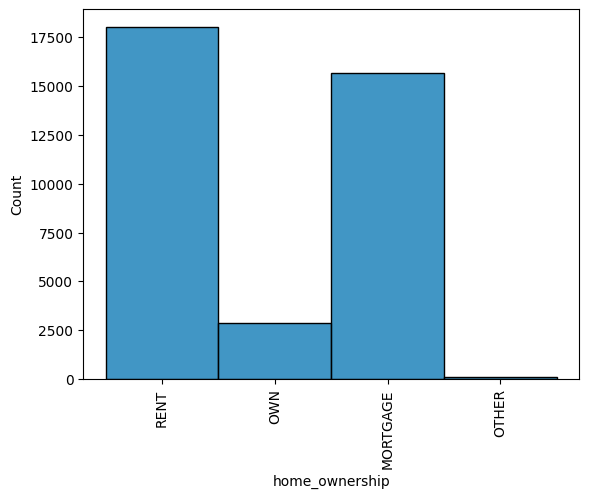

In [604]:
# Replacing 'NONE' values in the data with 'OTHER' since there are only three in number.
loan_df.home_ownership.replace(to_replace = ['NONE'], value='OTHER', inplace = True)
plot_df_series_histogram(given_df_series=loan_df.home_ownership)

311.11    65
180.96    56
311.02    52
150.80    46
372.12    44
          ..
771.43     1
415.50     1
626.08     1
538.77     1
84.33      1
Name: installment, Length: 14581, dtype: int64
None


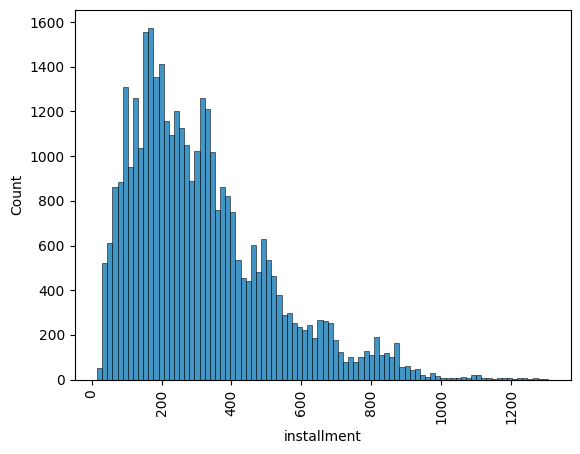

In [605]:
plot_df_series_histogram(given_df_series=loan_df.installment)

AxesSubplot(0.125,0.11;0.775x0.77)


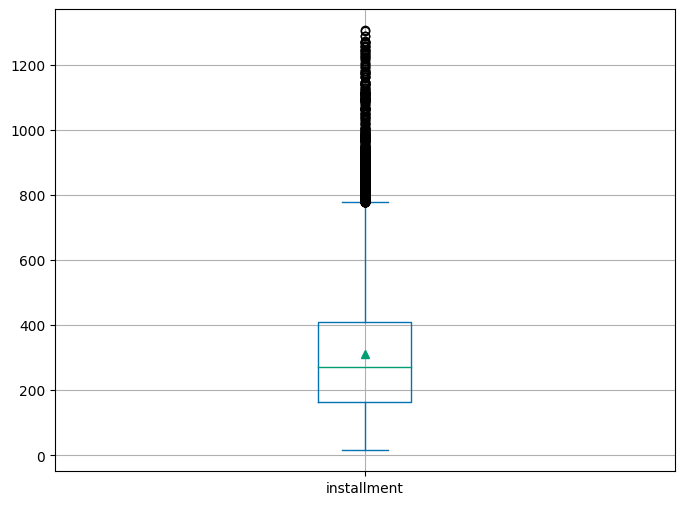

In [606]:
plot_df_series_box_plot(loan_df.installment)

36    27721
60     8933
Name: term, dtype: int64
None


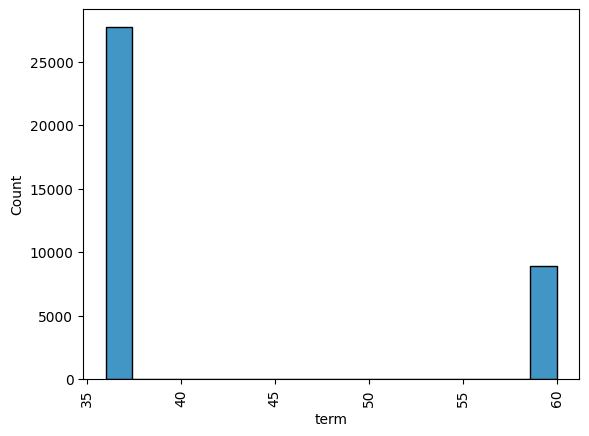

In [607]:
plot_df_series_histogram(given_df_series=loan_df.term)

debt_consolidation    17305
credit_card            4783
other                  3699
home_improvement       2556
major_purchase         2046
small_business         1623
car                    1448
wedding                 893
medical                 641
moving                  550
vacation                365
house                   338
educational             312
renewable_energy         95
Name: purpose, dtype: int64
None


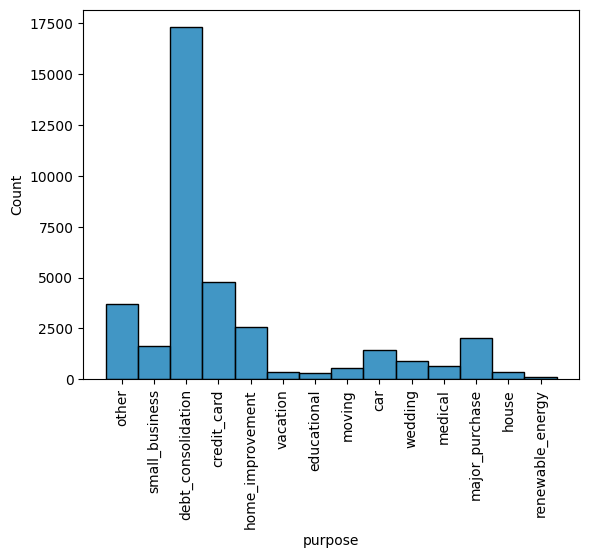

In [608]:
plot_df_series_histogram(given_df_series=loan_df.purpose)

10    8902
0     4327
2     4101
3     3824
4     3200
5     3044
1     3043
6     2073
7     1644
8     1343
9     1153
Name: emp_length, dtype: int64
None


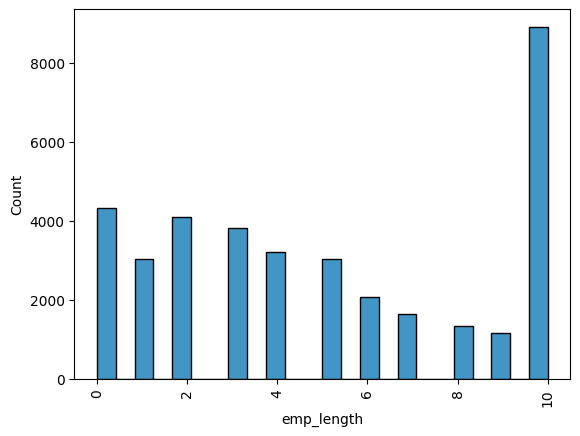

In [609]:
plot_df_series_histogram(loan_df.emp_length)

Not Verified       16280
Verified           11219
Source Verified     9155
Name: verification_status, dtype: int64
None


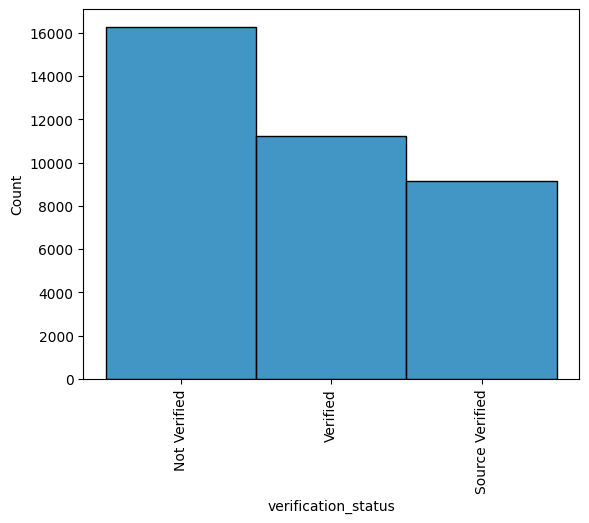

In [610]:
plot_df_series_histogram(given_df_series=loan_df.verification_status)

Fully Paid     31236
Charged Off     5418
Name: loan_status, dtype: int64
None


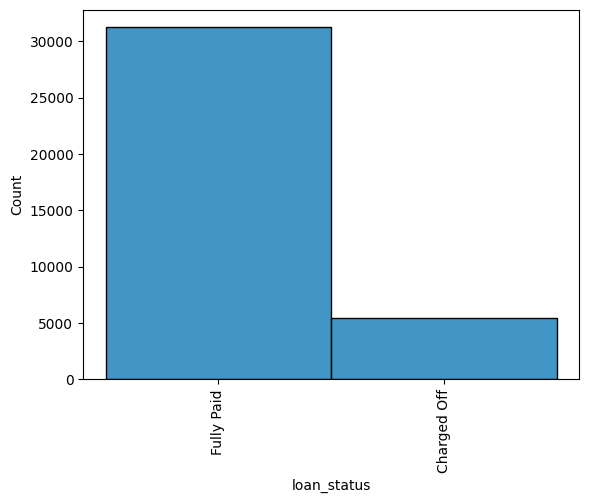

In [611]:
loan_df.loan_status = loan_df.loan_status.apply(lambda x: LOAN_STATUS_FULLY_PAID if x==0 else LOAN_STATUS_CHARGED_OFF)
plot_df_series_histogram(given_df_series=loan_df.loan_status)
# 1 - Charged Off
# 0 - Fully Paid

10000    2338
12000    1854
5000     1695
6000     1625
15000    1466
         ... 
1425        1
13325       1
7225        1
21450       1
20975       1
Name: loan_amnt, Length: 815, dtype: int64
None


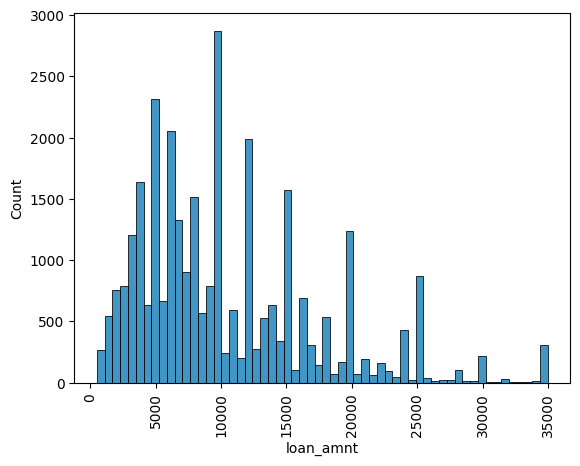

In [612]:
# 0 - Fully Paid
plot_df_series_histogram(given_df_series=loan_df.loan_amnt[loan_df.loan_status == LOAN_STATUS_FULLY_PAID])


10000    350
12000    294
5000     284
15000    247
25000    220
        ... 
11250      1
28800      1
19700      1
5725       1
5375       1
Name: loan_amnt, Length: 477, dtype: int64
None


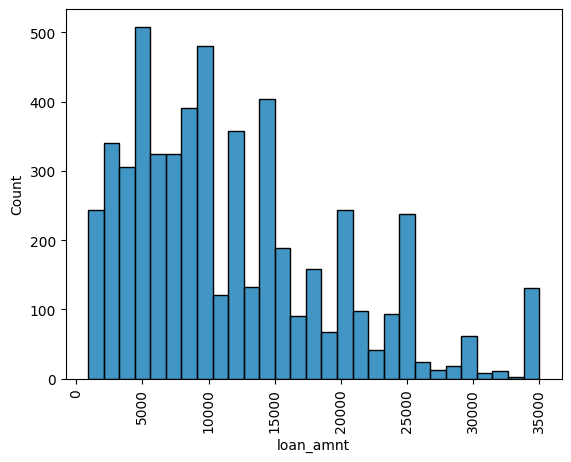

In [613]:
# 1 - Charged Off
plot_df_series_histogram(given_df_series=loan_df.loan_amnt[loan_df.loan_status == LOAN_STATUS_CHARGED_OFF])
# Maximum defaults on loans between 5-10k


2011-12-01    1967
2011-11-01    1961
2011-10-01    1810
2011-09-01    1790
2011-08-01    1700
2011-07-01    1652
2011-06-01    1617
2011-05-01    1528
2011-04-01    1496
2011-03-01    1363
2011-01-01    1321
2011-02-01    1241
2010-12-01    1210
2010-07-01    1084
2010-11-01    1076
2010-10-01    1075
2010-09-01    1031
2010-08-01    1029
2010-06-01     987
2010-05-01     886
2010-04-01     791
2010-03-01     698
2010-02-01     592
2009-11-01     569
2010-01-01     554
2009-12-01     553
2009-10-01     513
2009-09-01     426
2009-08-01     391
2009-07-01     355
2009-06-01     338
2009-05-01     305
2009-04-01     280
2009-03-01     267
2009-02-01     250
2009-01-01     229
2008-03-01     224
2008-12-01     207
2008-11-01     180
2008-02-01     168
2008-01-01     164
2008-04-01     146
2008-10-01      89
2007-12-01      82
2008-07-01      81
2008-05-01      69
2008-08-01      67
2008-06-01      65
2007-10-01      46
2007-11-01      34
2008-09-01      29
2007-08-01      28
2007-07-01  

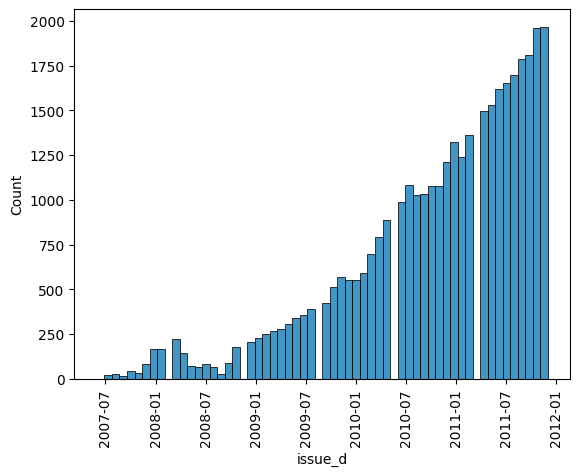

In [614]:
plot_df_series_histogram(loan_df.issue_d)
# Very high number of loans issued in the year 2011 as opposed to 2007.
# Most loans approved in the last couple of months of every year i.e. Nov, Dec.

<AxesSubplot: xlabel='grade', ylabel='count'>

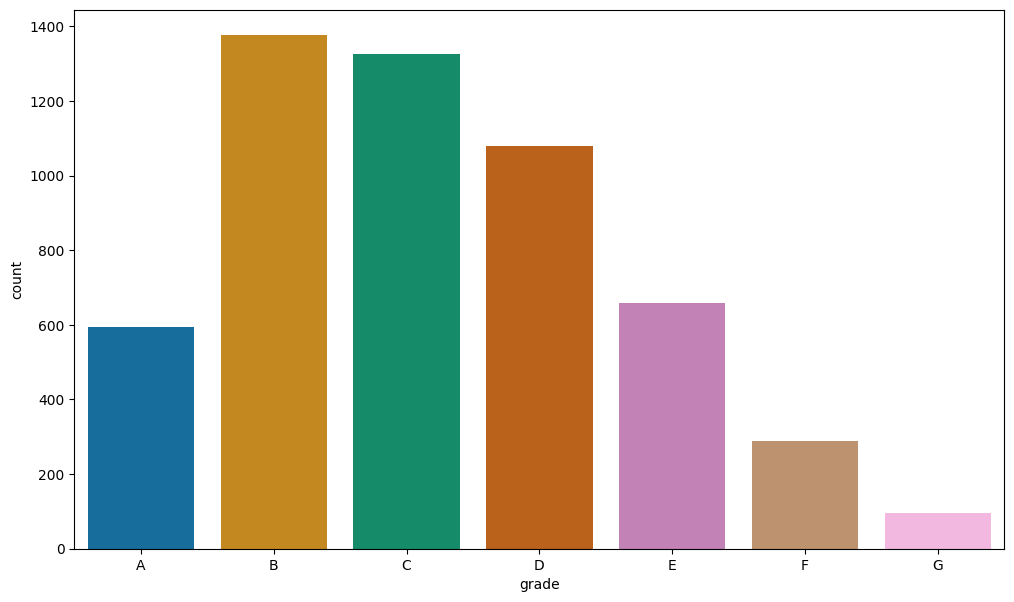

In [615]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(
    x = 'grade',
    order = list(sorted(set(loan_df.grade.values))),
    data = loan_df[loan_df.loan_status == LOAN_STATUS_CHARGED_OFF]
)
# Loan Status 1 implies Charged Off

In [616]:
print_percentage_of_values(loan_df.grade)

B    30.28
A    26.32
C    20.41
D    13.19
E     6.68
F     2.42
G     0.71
Name: grade, dtype: float64


<AxesSubplot: xlabel='sub_grade', ylabel='count'>

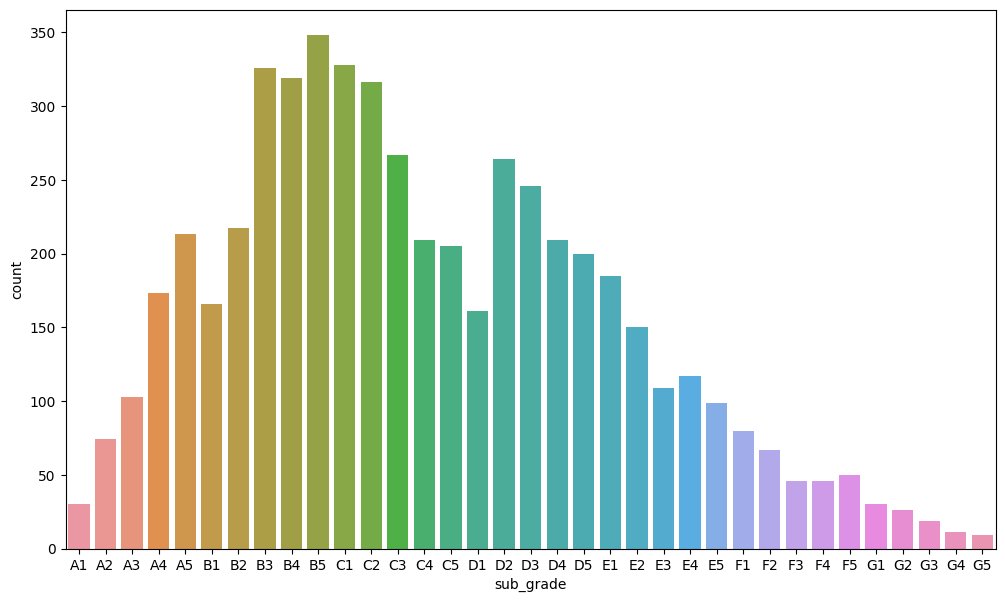

In [617]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(
    x = 'sub_grade',
    order = list(sorted(set(loan_df.sub_grade.values))),
    data = loan_df[loan_df.loan_status == LOAN_STATUS_CHARGED_OFF]
)
# Loan Status 1 implies Charged Off

## Bi Variate Analysis

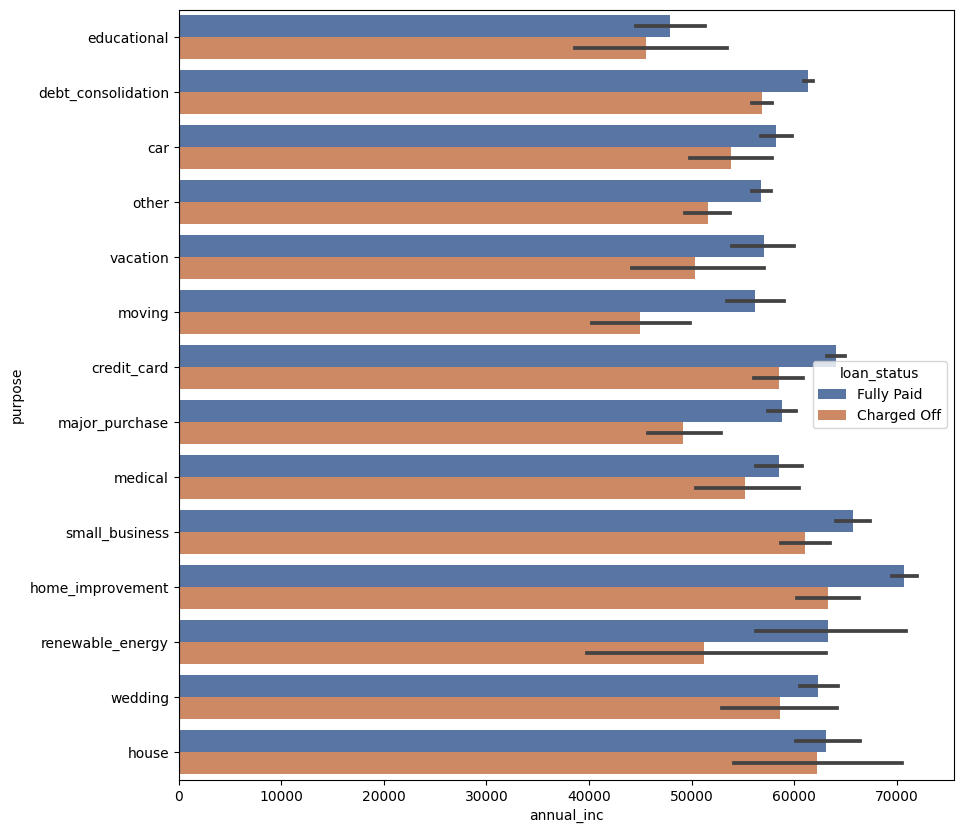

'Observations : It might seem like about the chances of a loan being termed as charged_off is very high in the case of house_loans as opposed to major_purchases or renewable energy.'

In [618]:
plot_df_series_histogram_on_categorical_data(df=loan_df, x="annual_inc", y="purpose", hue="loan_status")
"""Observations : It might seem like about the chances of a loan being termed as charged_off is very high in the case of house_loans as opposed to major_purchases or renewable energy."""

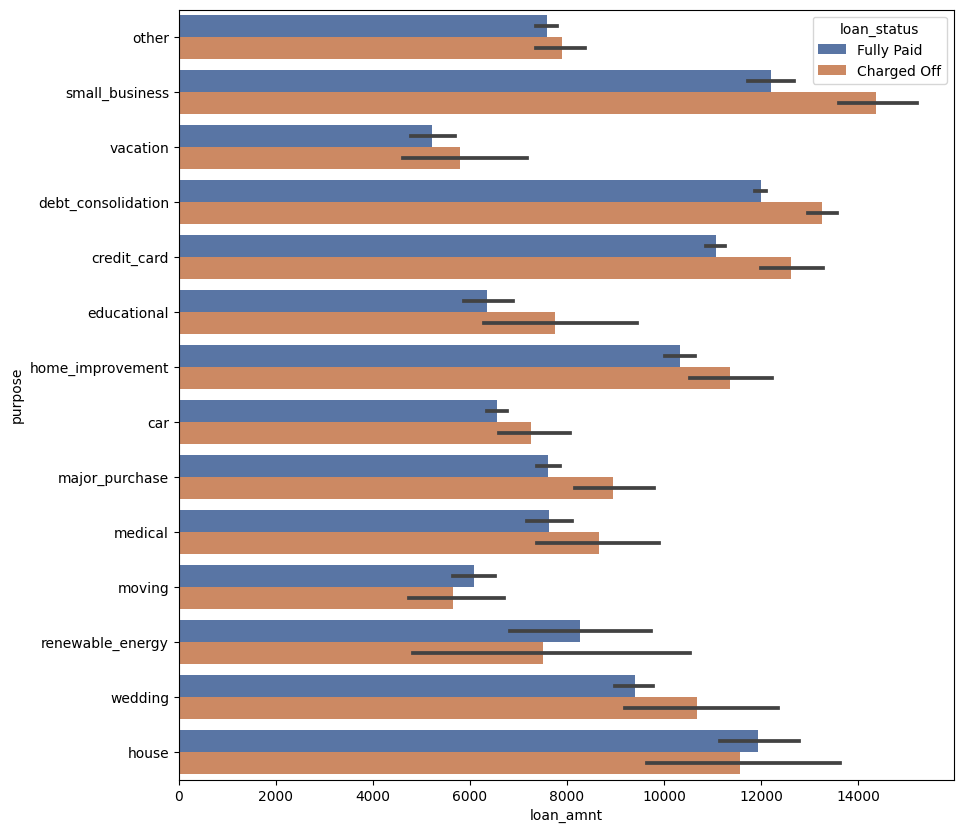

'Observations : Loans given to renewable energy, moving and house are likely to be fully paid'

In [619]:
plot_df_series_histogram_on_categorical_data(df=loan_df, x="loan_amnt", y="purpose", hue="loan_status")
"""Observations : Loans given to renewable energy, moving and house are likely to be fully paid"""

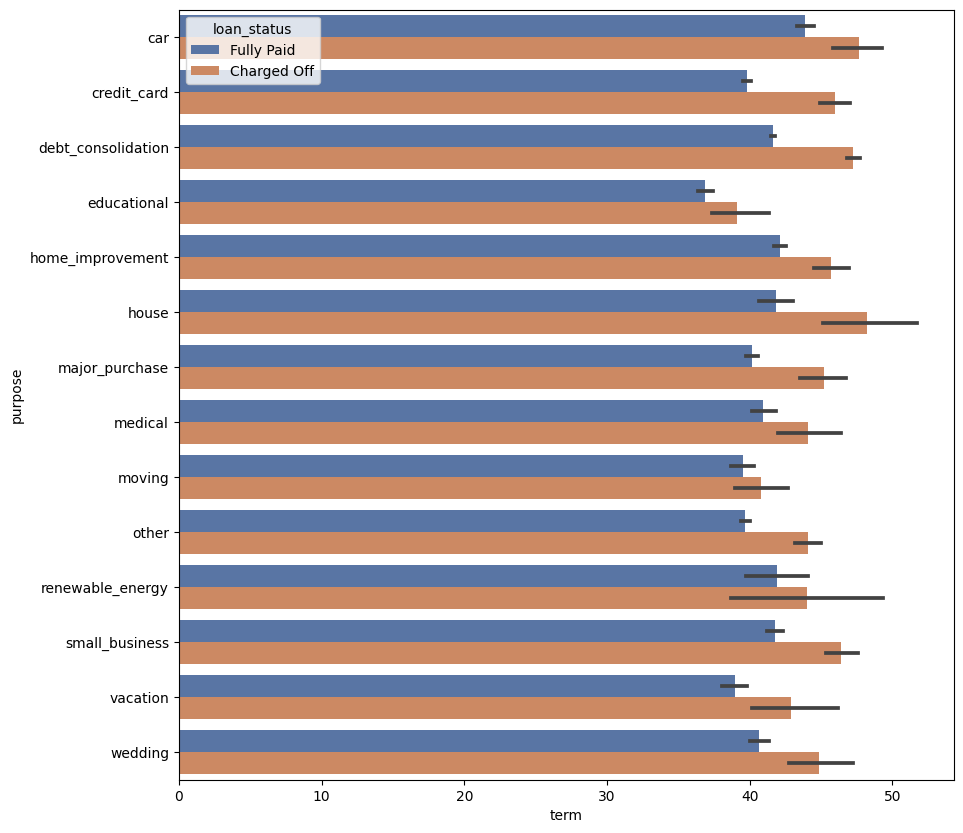

In [620]:
plot_df_series_histogram_on_categorical_data(df=loan_df, x="term", y="purpose", hue="loan_status")

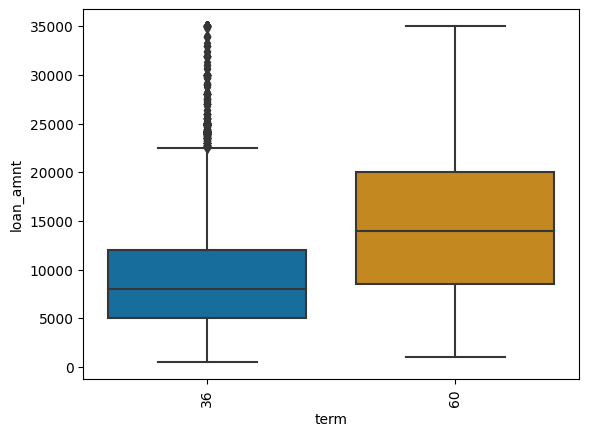

In [621]:
plot_df_series_box_plot_on_categorical_data(df=loan_df, x='term', y='loan_amnt')

# loan terms of 60 months
#   - 25th quantile and 75th quantile are higher compared to 36 month loan terms.
#   - 25th quantile is approximately equal to mean of 36 month loan terms
#   - mean is higher than 75th quantile of 36 month loan terms
#   - Interquartile Range is more than that of 36 month loan terms


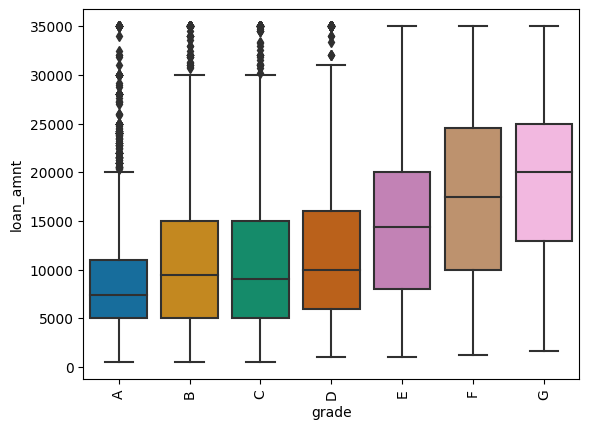

In [622]:
plot_df_series_box_plot_on_categorical_data(df=loan_df, x='grade', y='loan_amnt', sort_on=['grade'])


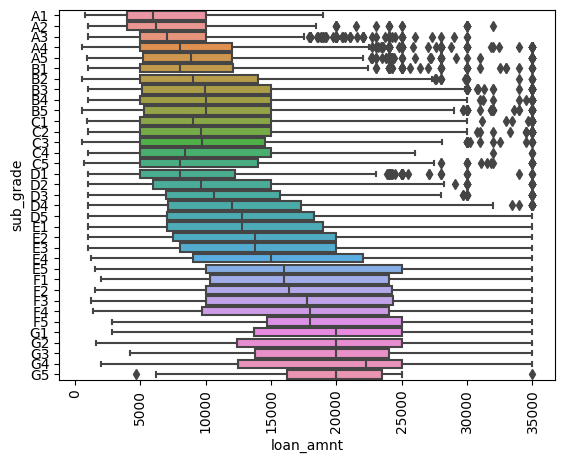

In [623]:
plot_df_series_box_plot_on_categorical_data(df=loan_df, x='loan_amnt', y='sub_grade', sort_on=['grade', 'sub_grade'])


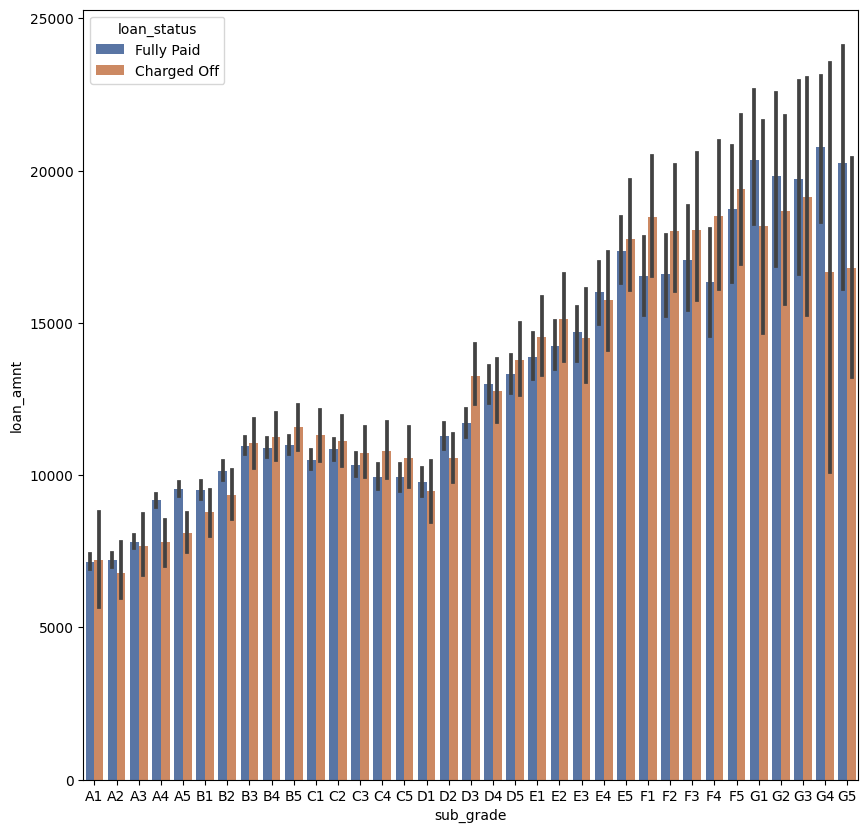

In [624]:
plot_df_series_histogram_on_categorical_data(df=loan_df, y="loan_amnt", x="sub_grade", hue="loan_status")

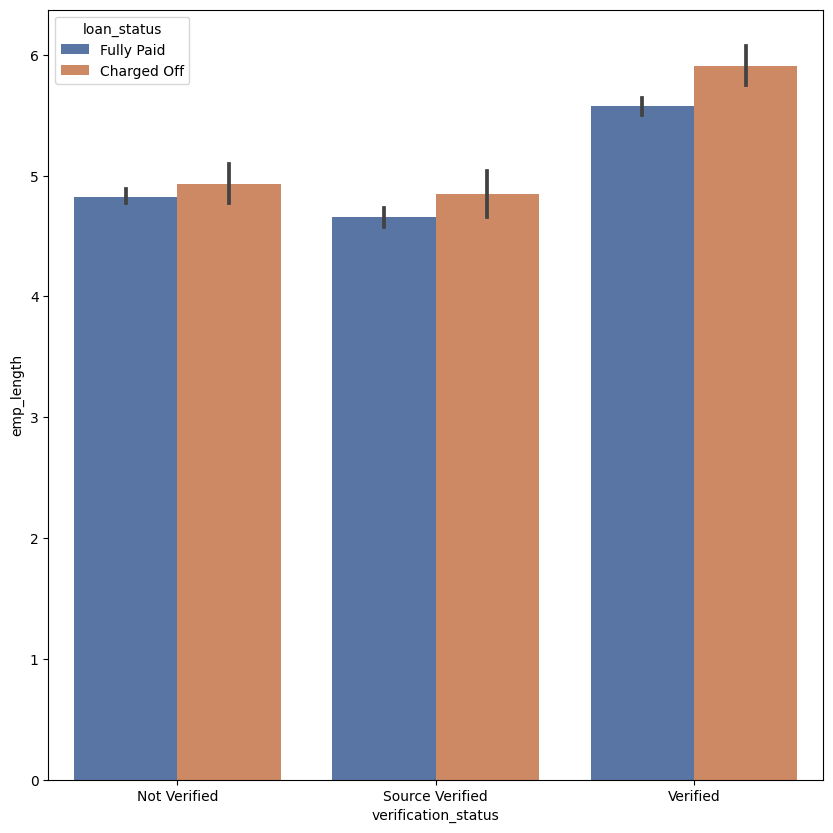

In [627]:
plot_df_series_histogram_on_categorical_data(df=loan_df, y="emp_length", x="verification_status", hue="loan_status")

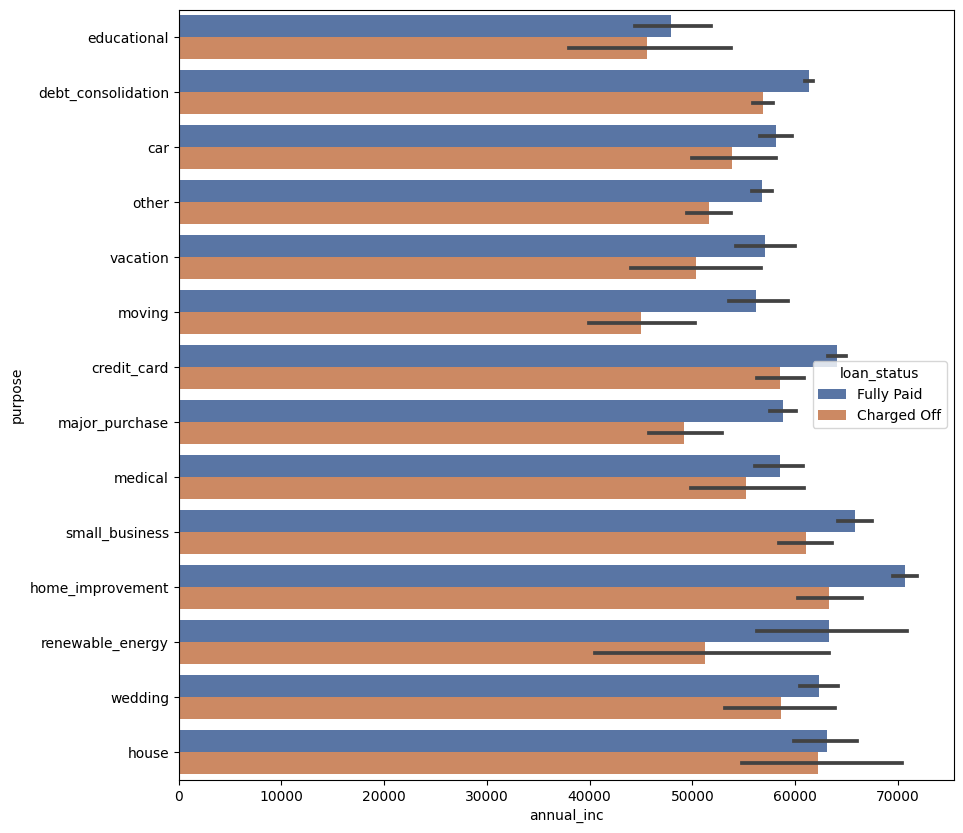

In [631]:
plot_df_series_histogram_on_categorical_data(df=loan_df, x="annual_inc", y="purpose", hue="loan_status")

In [628]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti'],
      dtype='object')

In [625]:
correlated_loan_df = loan_df.corr(numeric_only=True)
correlated_loan_df.style.background_gradient(cmap='coolwarm')
# We can understand that as the loan_amnt increases so does funded_amnt_inv. This is an obvious correlation.
# As the loan_amnt increases so does installment.

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti
loan_amnt,1.000000,0.936925,0.349710,0.291189,0.931481,0.131722,0.403197,0.090313
funded_amnt_inv,0.936925,1.000000,0.348494,0.288787,0.902641,0.144569,0.382429,0.097070
term,0.349710,0.348494,1.000000,0.435568,0.091776,0.100791,0.080212,0.078732
int_rate,0.291189,0.288787,0.435568,1.000000,0.269193,-0.014069,0.054022,0.111683
installment,0.931481,0.902641,0.091776,0.269193,1.000000,0.103221,0.398193,0.079392
emp_length,0.131722,0.144569,0.100791,-0.014069,0.103221,1.000000,0.160975,0.052969
annual_inc,0.403197,0.382429,0.080212,0.054022,0.398193,0.160975,1.000000,-0.072641
dti,0.090313,0.097070,0.078732,0.111683,0.079392,0.052969,-0.072641,1.000000
